# Tiền xử lý

In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Đọc dataset từ file CSV
df = pd.read_csv("traffic_accidents.csv")


# Xóa cột "crash_date" nếu tồn tại
if "crash_date" in df.columns:
    df = df.drop(columns=["crash_date"])

# Các cột cần mã hóa
categorical_columns = [
    "traffic_control_device", "weather_condition", "lighting_condition", "first_crash_type",
    "trafficway_type", "alignment", "roadway_surface_cond", "road_defect", "crash_type",
    "intersection_related_i", "damage", "prim_contributory_cause", "most_severe_injury"
]

# In ra tên các cột trong DataFrame để kiểm tra
print(df.columns)

# Dictionary để lưu các label encoder
decoders = {}

# Mã hóa từng cột
for col in categorical_columns:
    # Kiểm tra xem cột có tồn tại trong DataFrame không
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])  # Thay đổi trực tiếp giá trị trong cột
        decoders[col] = dict(zip(le.classes_, le.transform(le.classes_)))  # Lưu mapping cho báo cáo
    else:
        print(f"Cột '{col}' không tồn tại trong DataFrame.")

# Xuất báo cáo mã hóa
encoding_report = """Báo cáo Mã hóa Categorical Data\n\n"""
for col, mapping in decoders.items():
    encoding_report += f"Cột: {col}\n"
    for key, value in mapping.items():
        encoding_report += f"  {key}: {value}\n"
    encoding_report += "\n"

# Xuất báo cáo mã hoá ra file
with open("encoding_report.txt", "w", encoding="utf-8") as f:
    f.write(encoding_report)

# Lưu dataset đã mã hóa
encoded_file = "encoded_dataset.csv"
df.to_csv(encoded_file, index=False)

print(f"Mã hóa hoàn tất! Dataset đã lưu vào: {encoded_file}")
print(f"Báo cáo mã hóa đã lưu vào: encoding_report.txt")

Index(['traffic_control_device', 'weather_condition', 'lighting_condition',
       'first_crash_type', 'trafficway_type', 'alignment',
       'roadway_surface_cond', 'road_defect', 'crash_type',
       'intersection_related_i', 'damage', 'prim_contributory_cause',
       'num_units', 'most_severe_injury', 'injuries_total', 'injuries_fatal',
       'injuries_incapacitating', 'injuries_non_incapacitating',
       'injuries_reported_not_evident', 'injuries_no_indication', 'crash_hour',
       'crash_day_of_week', 'crash_month'],
      dtype='object')
Mã hóa hoàn tất! Dataset đã lưu vào: encoded_dataset.csv
Báo cáo mã hóa đã lưu vào: encoding_report.txt


In [22]:
# Thông tin tổng quan về dataset sau xử lý
print("Dataset Shape:", df.shape)

Dataset Shape: (209306, 23)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   traffic_control_device         209306 non-null  int64  
 1   weather_condition              209306 non-null  int64  
 2   lighting_condition             209306 non-null  int64  
 3   first_crash_type               209306 non-null  int64  
 4   trafficway_type                209306 non-null  int64  
 5   alignment                      209306 non-null  int64  
 6   roadway_surface_cond           209306 non-null  int64  
 7   road_defect                    209306 non-null  int64  
 8   crash_type                     209306 non-null  int64  
 9   intersection_related_i         209306 non-null  int64  
 10  damage                         209306 non-null  int64  
 11  prim_contributory_cause        209306 non-null  int64  
 12  num_units                     

In [24]:
df.isnull().sum()

,0
traffic_control_device,0
weather_condition,0
lighting_condition,0
first_crash_type,0
trafficway_type,0
alignment,0
roadway_surface_cond,0
road_defect,0
crash_type,0
intersection_related_i,0


In [25]:
df.describe()

,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,intersection_related_i,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
count,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,...,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000,209306.000000
mean,14.022274,3.131353,2.437221,9.746668,6.885861,3.010946,1.371695,1.697701,0.560787,0.952309,...,2.269514,0.382717,0.001859,0.038102,0.221241,0.121516,2.244002,13.373047,4.144024,6.771822
std,4.174489,2.476463,1.074239,6.700632,3.553885,0.192001,2.400657,1.516204,0.496292,0.213112,...,0.650588,0.799720,0.047502,0.233964,0.614960,0.450865,1.241175,5.603830,1.966864,3.427593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,15.000000,2.000000,1.000000,1.250000,6.000000,3.000000,0.000000,1.000000,0.000000,1.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,2.000000,4.000000
50%,16.000000,2.000000,3.000000,10.000000,8.000000,3.000000,0.000000,1.000000,1.000000,1.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,14.000000,4.000000,7.000000
75%,16.000000,2.000000,3.000000,17.000000,8.000000,3.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,17.000000,6.000000,10.000000
max,18.000000,11.000000,5.000000,17.000000,19.000000,5.000000,6.000000,6.000000,1.000000,1.000000,...,4.000000,21.000000,3.000000,7.000000,21.000000,15.000000,49.000000,23.000000,7.000000,12.000000


In [26]:
# Kiểm tra phân phối dữ liệu của các cột đã mã hóa
print("\nPhân phối dữ liệu của một số cột đã mã hóa:")
for col in categorical_columns[:5]:
    print(f"\nPhân phối của cột {col}:")
    print(df[col].value_counts())

df


Phân phối dữ liệu của một số cột đã mã hóa:

Phân phối của cột traffic_control_device:
traffic_control_device
16    123944
15     49139
4      29508
17      4455
6        670
18       468
10       247
8        181
3        153
2        150
11       104
9         95
12        78
14        33
7         23
13        18
1         17
5         12
0         11
Name: count, dtype: int64

Phân phối của cột weather_condition:
weather_condition
2     164700
7      21703
3       7533
10      6871
11      6534
6        627
5        510
4        360
9        308
1        127
8         32
0          1
Name: count, dtype: int64

Phân phối của cột lighting_condition:
lighting_condition
3    134109
1     53378
0      7436
4      6323
5      4336
2      3724
Name: count, dtype: int64

Phân phối của cột first_crash_type:
first_crash_type
17    64157
0     52250
10    42018
15    20116
9      8996
8      5337
7      4893
2      4742
14     1839
3      1790
11     1157
13      773
5       759
4       249


,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,intersection_related_i,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,16,2,3,17,8,3,5,5,1,1,...,2,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,16,2,1,17,6,3,0,1,1,1,...,2,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,16,2,3,10,15,3,0,1,1,1,...,2,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,16,2,3,0,6,3,0,1,0,1,...,3,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,16,2,3,10,15,3,5,5,1,1,...,2,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209301,17,11,5,17,6,3,5,5,1,1,...,2,0.0,0.0,0.0,0.0,0.0,2.0,13,4,9
209302,17,2,3,15,8,3,0,1,1,1,...,2,0.0,0.0,0.0,0.0,0.0,2.0,14,3,7
209303,16,2,3,9,2,4,0,1,0,0,...,1,2.0,0.0,2.0,0.0,0.0,0.0,13,4,10
209304,4,2,3,9,15,3,0,1,0,1,...,3,1.0,0.0,0.0,1.0,0.0,1.0,15,2,6


In [27]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# Đọc dataset
file_path = 'encoded_dataset.csv'  # Đặt đường dẫn dataset của bạn
df = pd.read_csv(file_path)

df = df.sample(2000) # Lấy ngẫu nhiên 2000 dòng dữ liệu

# Khởi tạo đồ thị
G = nx.Graph()

# Thêm nút cho mỗi vụ tai nạn (dựa trên index)
for index, row in df.iterrows():
    G.add_node(index,
               traffic_control_device=row['traffic_control_device'],
               weather_condition=row['weather_condition'],
               lighting_condition=row['lighting_condition'],
               first_crash_type=row['first_crash_type'],
               trafficway_type=row['trafficway_type'],
               alignment=row['alignment'],
               roadway_surface_cond=row['roadway_surface_cond'],
               road_defect=row['road_defect'],
               crash_type=row['crash_type'],
               intersection_related_i=row['intersection_related_i'],
               damage=row['damage'],
               prim_contributory_cause=row['prim_contributory_cause'],
               num_units=row['num_units'],
               most_severe_injury=row['most_severe_injury'],
               injuries_total=row['injuries_total'],
               injuries_fatal=row['injuries_fatal'],
               injuries_incapacitating=row['injuries_incapacitating'],
               injuries_non_incapacitating=row['injuries_non_incapacitating'],
               injuries_reported_not_evident=row['injuries_reported_not_evident'],
               injuries_no_indication=row['injuries_no_indication'],
               crash_hour=row['crash_hour'],
               crash_day_of_week=row['crash_day_of_week'],
               crash_month=row['crash_month'])

# Hàm kiểm tra điều kiện kết nối giữa hai vụ tai nạn
def is_similar(accident1, accident2):
    # Các điều kiện tương tự dựa trên các đặc trưng quan trọng
    time_diff = abs(accident1['crash_hour'] - accident2['crash_hour']) <= 1
    same_month = accident1['crash_month'] == accident2['crash_month']
    same_day_of_week = accident1['crash_day_of_week'] == accident2['crash_day_of_week']
    same_trafficway = accident1['trafficway_type'] == accident2['trafficway_type']
    same_crash_type = accident1['first_crash_type'] == accident2['first_crash_type']
    same_injury_no_indication = accident1['injuries_no_indication'] == accident2['injuries_no_indication']

    # Kết nối nếu ít nhất một điều kiện tương tự
    return (time_diff or same_month or same_day_of_week or same_trafficway or
            same_crash_type or same_injury_no_indication)

# Thêm các cạnh dựa trên tính tương đồng
for u, v in combinations(G.nodes(data=True), 2):
    if is_similar(u[1], v[1]):
        G.add_edge(u[0], v[0])

print("Đồ thị G đã được tạo với", G.number_of_nodes(), "nút và", G.number_of_edges(), "cạnh.")

Đồ thị G đã được tạo với 2000 nút và 1443980 cạnh.


In [31]:
# Đọc toàn bộ file encoding_report.txt
file_path = "encoding_report.txt"

with open(file_path, "r", encoding="utf-8") as f:
    content = f.read()

print("Nội dung của encoding_report.txt:")
print(content)

Nội dung của encoding_report.txt:
Báo cáo Mã hóa Categorical Data

Cột: traffic_control_device
  BICYCLE CROSSING SIGN: 0
  DELINEATORS: 1
  FLASHING CONTROL SIGNAL: 2
  LANE USE MARKING: 3
  NO CONTROLS: 4
  NO PASSING: 5
  OTHER: 6
  OTHER RAILROAD CROSSING: 7
  OTHER REG. SIGN: 8
  OTHER WARNING SIGN: 9
  PEDESTRIAN CROSSING SIGN: 10
  POLICE/FLAGMAN: 11
  RAILROAD CROSSING GATE: 12
  RR CROSSING SIGN: 13
  SCHOOL ZONE: 14
  STOP SIGN/FLASHER: 15
  TRAFFIC SIGNAL: 16
  UNKNOWN: 17
  YIELD: 18

Cột: weather_condition
  BLOWING SAND, SOIL, DIRT: 0
  BLOWING SNOW: 1
  CLEAR: 2
  CLOUDY/OVERCAST: 3
  FOG/SMOKE/HAZE: 4
  FREEZING RAIN/DRIZZLE: 5
  OTHER: 6
  RAIN: 7
  SEVERE CROSS WIND GATE: 8
  SLEET/HAIL: 9
  SNOW: 10
  UNKNOWN: 11

Cột: lighting_condition
  DARKNESS: 0
  DARKNESS, LIGHTED ROAD: 1
  DAWN: 2
  DAYLIGHT: 3
  DUSK: 4
  UNKNOWN: 5

Cột: first_crash_type
  ANGLE: 0
  ANIMAL: 1
  FIXED OBJECT: 2
  HEAD ON: 3
  OTHER NONCOLLISION: 4
  OTHER OBJECT: 5
  OVERTURNED: 6
  PARKED 

# Huấn luyện

In [ ]:
pip install torch-geometric

In [13]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv, LayerNorm
from torch_geometric.data import Data
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [14]:
# Xử lý mất cân bằng dữ liệu bằng over-sampling
class FocalLoss(torch.nn.Module):
    def __init__(self, alpha=None, gamma=2.0):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma

    def forward(self, logits, targets):
        ce_loss = F.cross_entropy(logits, targets, weight=self.alpha, reduction="none")
        pt = torch.exp(-ce_loss)  # Tính xác suất dự đoán đúng
        focal_loss = (1 - pt) ** self.gamma * ce_loss
        return focal_loss.mean()

In [15]:
# Chuyển đổi đồ thị sang PyG Data
def networkx_to_pyg(G, label_attr="damage"):
    node_mapping = {node: i for i, node in enumerate(G.nodes())}
    edge_index = torch.tensor([[node_mapping[u], node_mapping[v]] for u, v in G.edges()], dtype=torch.long).t().contiguous()

    features = []
    labels = []
    for node, data in G.nodes(data=True):
        node_features = [data[attr] for attr in data if attr != label_attr]
        features.append(node_features)
        labels.append(data[label_attr])

    X = torch.tensor(features, dtype=torch.float)
    y = torch.tensor(labels, dtype=torch.long)

    return Data(x=X, edge_index=edge_index, y=y)

In [16]:
# Chuyển đổi đồ thị
graph_data = networkx_to_pyg(G)

# Cân bằng dữ liệu bằng SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(graph_data.x.numpy(), graph_data.y.numpy())
graph_data.x = torch.tensor(X_resampled, dtype=torch.float)
graph_data.y = torch.tensor(y_resampled, dtype=torch.long)

# Chia tập train/test/val
train_nodes, remaining_nodes = train_test_split(range(graph_data.num_nodes), test_size=0.4, random_state=42)
test_nodes, val_nodes = train_test_split(remaining_nodes, test_size=0.25, random_state=42)

graph_data.train_mask = torch.tensor(train_nodes, dtype=torch.long)
graph_data.test_mask = torch.tensor(test_nodes, dtype=torch.long)
graph_data.val_mask = torch.tensor(val_nodes, dtype=torch.long)

# Trọng số class cho Focal Loss
unique, counts = np.unique(graph_data.y.numpy(), return_counts=True)
class_weights = torch.tensor(1.0 / counts, dtype=torch.float)
class_weights /= class_weights.sum()
loss_fn = FocalLoss(alpha=class_weights, gamma=2.0)

In [17]:
# Mô hình GAT
class GAT(torch.nn.Module):
    def __init__(self, in_features, hidden_dim, out_features, heads=8):
        super(GAT, self).__init__()
        self.gat1 = GATConv(in_features, hidden_dim, heads=heads, dropout=0.2)
        self.ln1 = LayerNorm(hidden_dim * heads)  # LayerNorm thay cho BatchNorm

        self.gat2 = GATConv(hidden_dim * heads, hidden_dim, heads=4, dropout=0.2)
        self.ln2 = LayerNorm(hidden_dim * 4)

        self.gat3 = GATConv(hidden_dim * 4, out_features, heads=1, concat=False, dropout=0.2)

        self.dropout = torch.nn.Dropout(0.1)

    def forward(self, x, edge_index):
        x = self.gat1(x, edge_index)
        x = self.ln1(x)
        x = F.elu(x)
        x = self.dropout(x)

        x = self.gat2(x, edge_index)
        x = self.ln2(x)
        x = F.elu(x)
        x = self.dropout(x)

        x = self.gat3(x, edge_index)
        return F.log_softmax(x, dim=1)

In [18]:
# Khởi tạo mô hình
model = GAT(in_features=graph_data.x.shape[1], hidden_dim=16, out_features=len(graph_data.y.unique()))
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10, verbose=True)

# Huấn luyện mô hình
epochs = []
accuracies = []
f1_scores = []
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    out = model(graph_data.x, graph_data.edge_index)
    loss = loss_fn(out[graph_data.train_mask], graph_data.y[graph_data.train_mask])
    loss.backward()
    optimizer.step()
    scheduler.step(loss)

    # Đánh giá mô hình
    model.eval()
    with torch.no_grad():
        logits = model(graph_data.x, graph_data.edge_index)
        pred = logits.argmax(dim=1)

        y_true = graph_data.y[graph_data.test_mask].cpu().numpy()
        y_pred = pred[graph_data.test_mask].cpu().numpy()

        acc = accuracy_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred, average='macro')

        epochs.append(epoch)
        accuracies.append(acc)
        f1_scores.append(f1)

        if epoch % 20 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item():.4f}, Accuracy: {acc:.4f}, F1-score: {f1:.4f}")

/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 0, Loss: 0.2027, Accuracy: 0.3798, F1-score: 0.2183
Epoch 20, Loss: 0.0343, Accuracy: 0.6327, F1-score: 0.5228
Epoch 40, Loss: 0.0272, Accuracy: 0.6529, F1-score: 0.5730
Epoch 60, Loss: 0.0252, Accuracy: 0.6763, F1-score: 0.6287
Epoch 80, Loss: 0.0237, Accuracy: 0.6739, F1-score: 0.6323


Confusion Matrix:
[[295  62  50]
 [185 119 110]
 [  1   8 455]]
Confusion Matrix:
[[295  62  50]
 [185 119 110]
 [  1   8 455]]


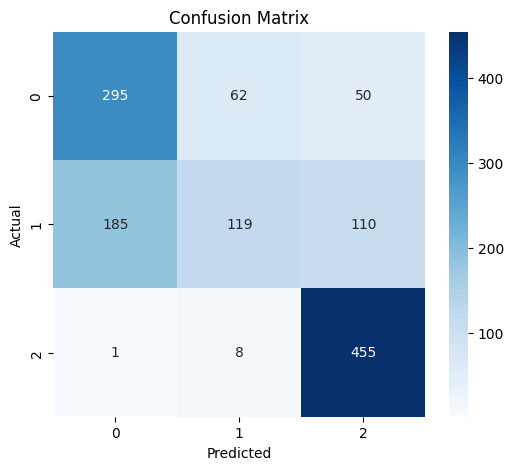

In [19]:
# Tính confusion_matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")


# In confusion_matrix dạng văn bản
print("Confusion Matrix:")
print(cm)

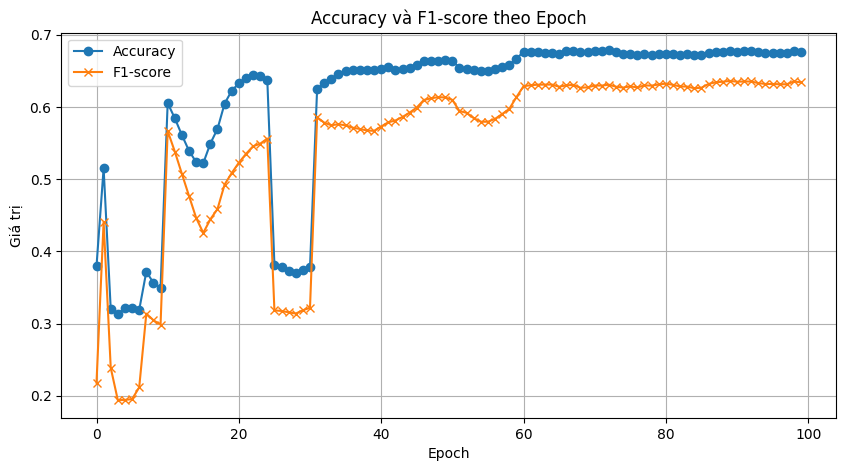

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracies, label='Accuracy', marker='o')
plt.plot(epochs, f1_scores, label='F1-score', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Giá trị')
plt.title('Accuracy và F1-score theo Epoch')
plt.legend()
plt.grid(True)
plt.show()